# Model Development

Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
%matplotlib inline 

Load the data and store it in dataframe df

In [3]:
filepath = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"
df = pd.read_csv(filepath)

In [4]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


<h2>1. Linear Regression and Multiple Linear Regression</h2>

<h4>Linear Regression</h4>
<p>Simple Linear Regression is a method to help us understand the relationship between two variables:</p>
<ul>
    <li>X: predictor/independent variable </li>
    <li>Y: response/dependent variable (that we want to predict)</li>
</ul>

<p>The result of Linear Regression is a <b>linear function</b> that predicts the response (dependent) variable as a function of the predictor (independent) variable.</p>

<center><b>Linear Function: </b>
Yhat = a + b  X</center>
<ul>
    <li>a refers to the <b>intercept</b> of the regression line, in other words: the value of Y when X is 0</li>
    <li>b refers to the <b>slope</b> of the regression line, in other words: the value with which Y changes when X increases by 1 unit</li>
</ul>

Load the modules for linear regression

In [5]:
from sklearn.linear_model import LinearRegression

Creating a linear regression object

In [6]:
lm=LinearRegression()
lm

LinearRegression()

Using simple linear regression and creating a linear function with "highway-mpg" as the predictor variable and the "price" as the response variable

In [7]:
X = df[['highway-mpg']]
Y = df['price']

Training the model using fit function

In [8]:
lm.fit(X,Y)

LinearRegression()

Predicting output

In [9]:
Yhat=lm.predict(X)
Yhat

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508, 17879.97140011, 17879.97140011, 17879.97140011,
       21988.63829172, 14593.03788682, 14593.03788682, 15414.77126514,
       15414.77126514, 17879.97140011, 20345.17153508, 20345.17153508,
       21988.63829172, -5128.5631929 ,  3088.77059031,  3088.77059031,
        4732.23734696,  7197.43748192, 13771.3045085 ,  7197.43748192,
        7197.43748192,  7197.43748192, 13771.3045085 , 13771.3045085 ,
       18701.70477843, -5950.29657123,  7197.43748192,  3910.50396864,
       10484.37099521, 10484.37099521, 10484.37099521, 10484.37099521,
       11306.10437353, 11306.10437353, 11306.10437353, 11306.10437353,
       15414.77126514, 12949.57113018, 14593.03788682, 14593.03788682,
       22810.37167004, 22810.37167004, 24453.83842668, 12949.57113018,
        7197.43748192,  7197.43748192,  7197.43748192,  7197.43748192,
       19523.43815675, 19523.43815675, 19523.43815675, 19523.43815675,
      

Finding intercept and slope

In [10]:
lm.intercept_

38423.3058581574

In [11]:
lm.coef_

array([-821.73337832])

<h4>Final estimated linear model:</h4>
<p>As,
Yhat = a + bX </p>
<p> On putting the actual values we get:</p>


Equation of the predicted line

In [12]:
Yhat=38423.31 - 821.73*X

Price=38423.31 - 821.73*df['highway-mpg']

<b>Creating another simple linear regression object</b>

In [13]:
lm1=LinearRegression()
lm1

LinearRegression()

Training the model using "engine-size" as the independent variable and "price" as the dependent variable

In [14]:
lm1.fit(df[['engine-size']], df[['price']])
lm1

LinearRegression()

Finding slope and intercept

In [15]:
lm1.coef_

array([[166.86001569]])

In [16]:
lm1.intercept_

array([-7963.33890628])

Equation of the predicted line

In [17]:
Yhat=-7963.34 + 166.86*X

Price=-7963.34 + 166.86*df['engine-size']

<h4>Multiple Linear Regression</h4>

<p>Multiple Linear Regression is used to explain the relationship between one continuous response (dependent) variable and <b>two or more</b> predictor (independent) variables: </p>

<ul>
    <li>Y: target or response variable </li>
    <li>X1 :predictor variable 1</li>
    <li>X2: predictor variable 2</li>
    <li>X3: predictor variable 3</li>
    <li>X_4: predictor variable 4</li>
</ul>
<p>The equation is given by: </p>
<center>Yhat = a + b1 X1 + b2 X2 + b3 X3 + b4 X4</center>


Developing a model using Horsepower, Curb-weight, Engine-size, Highway-mpg variables as the predictor variables

In [18]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

Fit the model 

In [19]:
lm.fit(Z, df['price'])

LinearRegression()

Predicting output

In [20]:
Y_hat = lm.predict(Z)
Y_hat

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097, 10722.32509097, 17804.80307397,
       18063.72662867, 19320.78745066, 26968.56492801, 27674.72007721,
       28191.0677239 ,   650.62317688,  5648.50489642,  5813.27443123,
        5478.81383232,  5370.64136587,  8739.61952024,  5799.04215638,
        5902.61157827,  5902.61157827,  9036.2046829 , 11863.43973759,
       18767.70667001,  4808.3090102 ,  5693.32889063,  4006.47212651,
        6118.73075572,  6194.05397163,  6448.26982534,  6514.17763926,
        9478.65495235,  9728.16310506,  9798.77861998, 10118.90228761,
       11178.86719942, 10423.81935057,  9463.46710755, 12626.61544369,
       34470.03895495, 34470.03895495, 43996.52260522,  5265.67702191,
        5565.15645357,  5588.69495854,  5777.00299832,  5800.5415033 ,
        7337.21461795,  7337.21461795,  7360.75312292, 10536.2966792 ,
      

Finding intercept and slope

In [21]:
lm.intercept_

-15806.62462632919

In [22]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

The final linear function is of the form: Yhat = a + b1 X1 + b2 X2 + b3 X3 + b4 X4

In [23]:
Price = -15678.742628061467 + 52.65851272* df['horsepower'] + 4.69878948*df['curb-weight'] + 81.95906216*df['engine-size'] + 33.58258185*df['highway-mpg']

<b>Creating another multiple linear regression object</b>

In [24]:
lm2=LinearRegression()
lm2

LinearRegression()

Training the model with target variable as "price" and the predictor variable as "normalized-losses" and "highway-mpg"

In [25]:
lm2.fit(df[['normalized-losses', 'highway-mpg']],df['price'])

LinearRegression()

Finding slope and intercept

In [26]:
lm2.intercept_

38201.31327245728

In [27]:
lm2.coef_

array([   1.49789586, -820.45434016])

The final linear function is: 

In [28]:
Price= 38201.31327245728 + 1.49789586*df['normalized-losses'] - 820.45434016*df['highway-mpg']

<h2>2. Model Evaluation Using Visualization</h2>

<h4>Visualizing Simple Linear Regression</h4>

<b>a. Regression Plot</b>
<p>It is used to visualize simple linear regression</p>
<p>It will show a combination of a scatterplot as well as the fitted linear regression line going through the data, giving a reasonable estimate of the relationship between the two variables, the strength of the correlation and the direction (positive or negative correlation)</p>

Visualizing highway-mpg as potential predictor variable of price:

(0.0, 48248.339559379805)

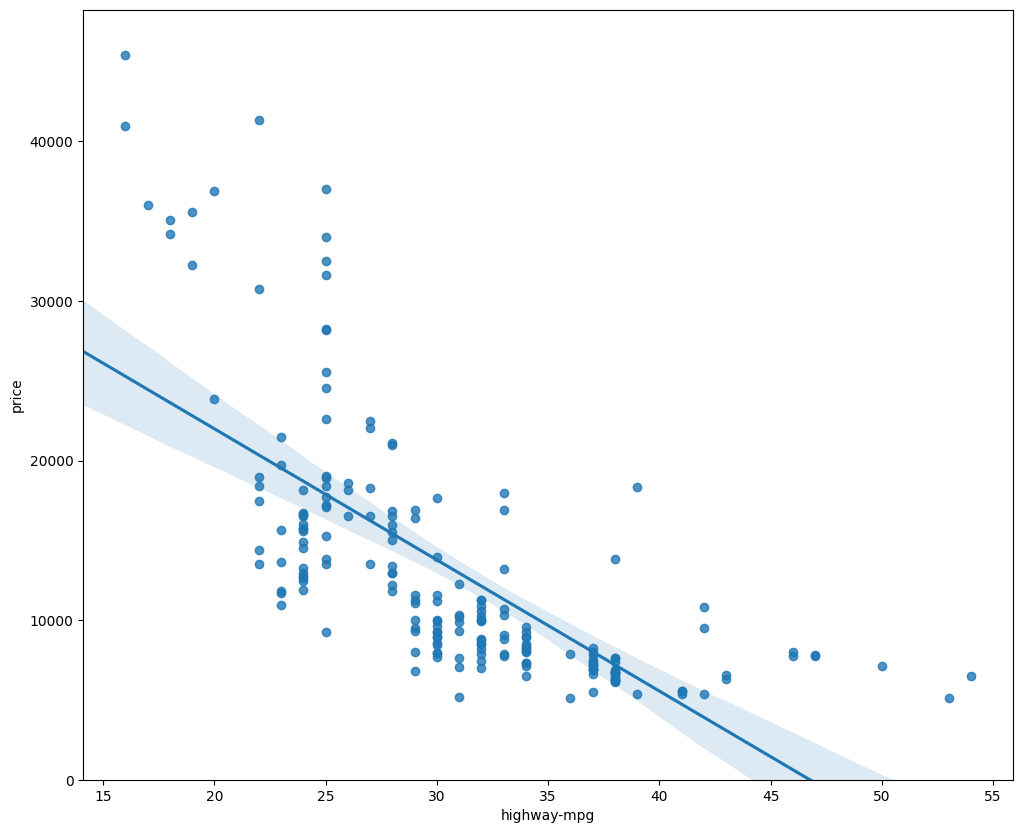

In [29]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

<b>Conclusion: </b>The price is negatively correlated to highway-mpg since the regression slope is negative. The points for "highway-mpg" are much closer to the generated line and, on average, decrease.

Comparing this plot to the regression plot of "peak-rpm"

(0.0, 47414.1)

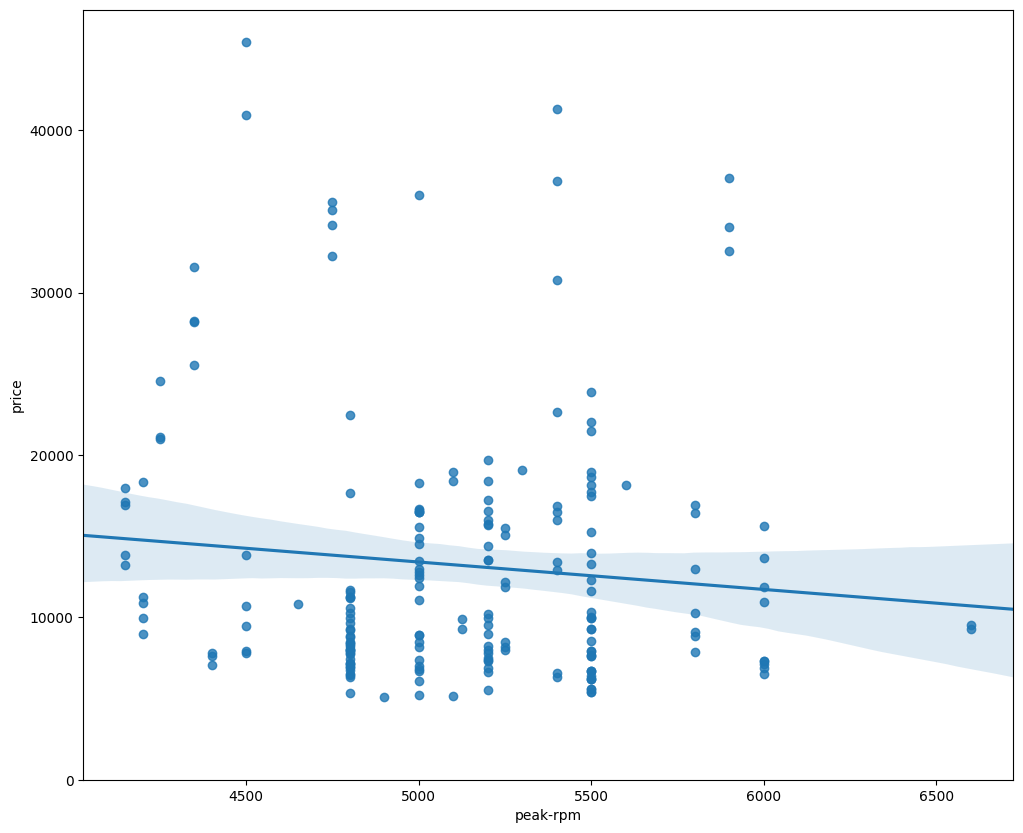

In [30]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

<b>Conclusion: </b>The points for "peak-rpm" have more spread around the predicted line and it is much harder to determine if the points are decreasing or increasing as the "peak-rpm" increases.

Checking which of the above two plots are strongly correlated with price

In [31]:
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


<b>Conclusion: </b>The variable "highway-mpg" has a stronger correlation with "price", it is approximate -0.704692  compared to "peak-rpm" which is approximate -0.101616.

<b>b. Residual Plot</b>

<p>A good way to visualize the variance of the data is to use a residual plot. The residual is the distance from the data point to the fitted regression line.</p>
<p>A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.</p>
<p>If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data as randomly spread out residuals means that the variance is constant and thus, the linear model is a good fit for the data.</p>

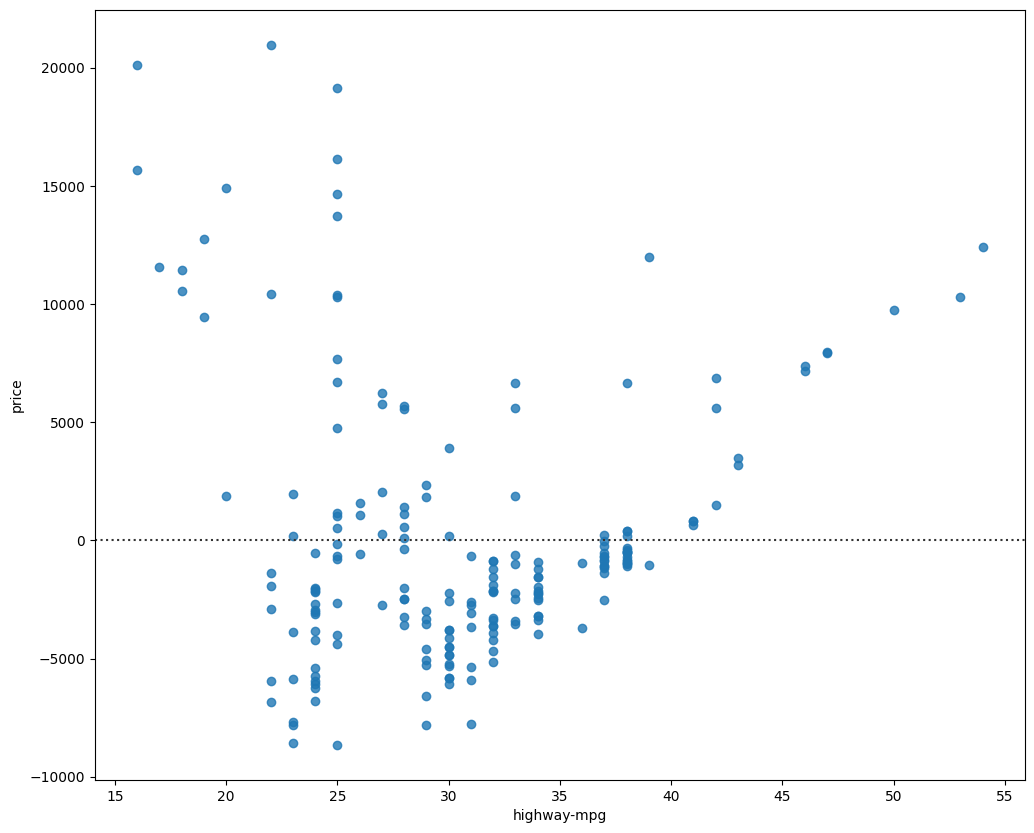

In [32]:
width=12
height=10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show()

<b>Conclusion: </b>The residuals are not randomly spread around the x-axis, indicating that maybe a non-linear model is more appropriate for this data.

Comparing this plot to the residual plot of "peak-rpm"

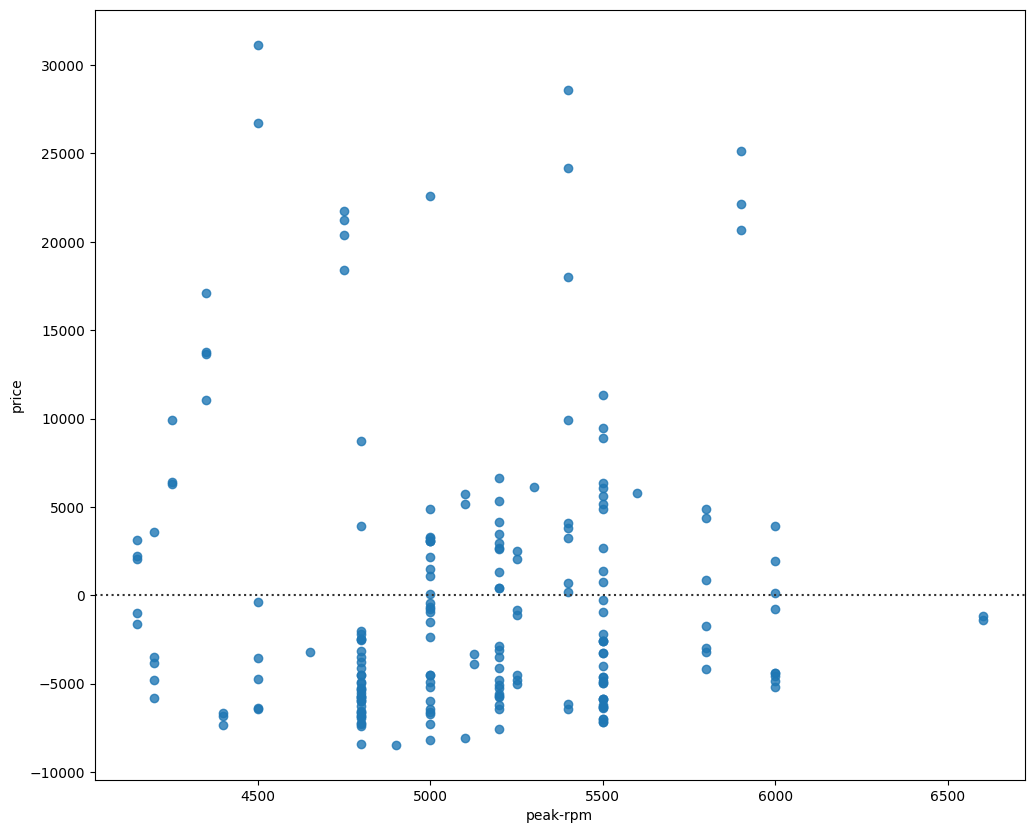

In [33]:
plt.figure(figsize=(width, height))
sns.residplot(x=df['peak-rpm'], y=df['price'])
plt.show()

Conclusion: The residuals are not randomly spread around the x-axis, indicating that maybe a non-linear model is more appropriate for this data.

<h4>Visualizing Multiple Linear Regression</h4>

<b>Distribution Plot</b>
<p>Multiple Linear Regression gets a bit more complicated because it can't be visualize using regression or residual plot.</p>
<p>The fit of the model is given by looking at the distribution plot.</p>
<p>The distribution of the fitted values that result from the model and compare it to the distribution of the actual values.</p>

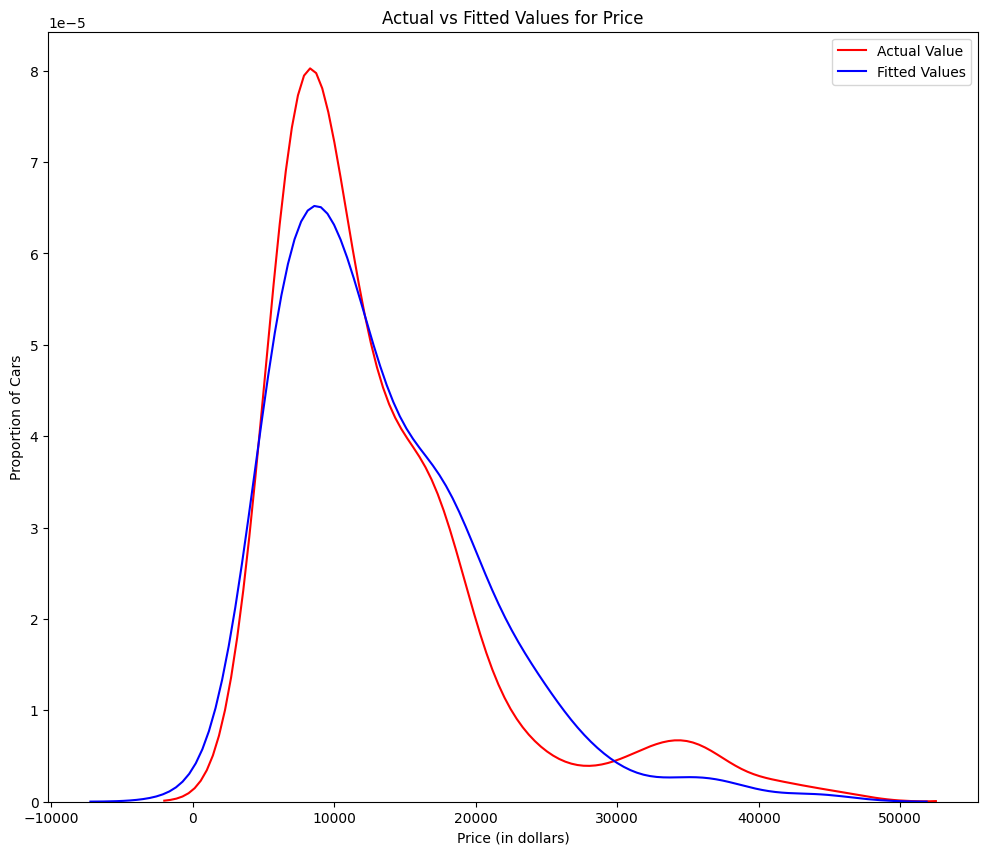

In [34]:
plt.figure(figsize=(width, height))
ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')
plt.show()
plt.close()

<b>Conclusion: </b> The fitted values are reasonably close to the actual values since the two distributions overlap a bit. However, there is definitely some room for improvement.

<h2>3. Polynomial Regression and Pipelines</h2>

<p><b>Polynomial regression</b> is a particular case of the general linear regression model or multiple linear regression models.</p> 
<p>The non-linear relationships are obtained by squaring or setting higher-order terms of the predictor variables.</p>

<p>There are different orders of polynomial regression:</p>
<center><b>Quadratic - 2nd Order: </b>
Yhat = a + b1 X +b2 X^2 </center>
<center><b>Cubic - 3rd Order: </b>
Yhat = a + b1 X +b2 X^2 +b3 X^3 </center>
<center><b>Higher-Order: </b>
Y = a + b1 X +b2 X^2 +b3 X^3 ....</center>

A linear model did not provide the best fit while using "highway-mpg" as the predictor variable.
Checking if a polynomial model provides a good fit to the data.

In [35]:
#creating a function
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [36]:
x=df['highway-mpg']
y=df['price']

Fitting the polynomial using the function <b>polyfit</b>, then using the function <b>poly1d</b> to display the polynomial function

In [37]:
#using a cubic polynomial
f=np.polyfit(x,y,3)
p=np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


Plotting the polynomial function:

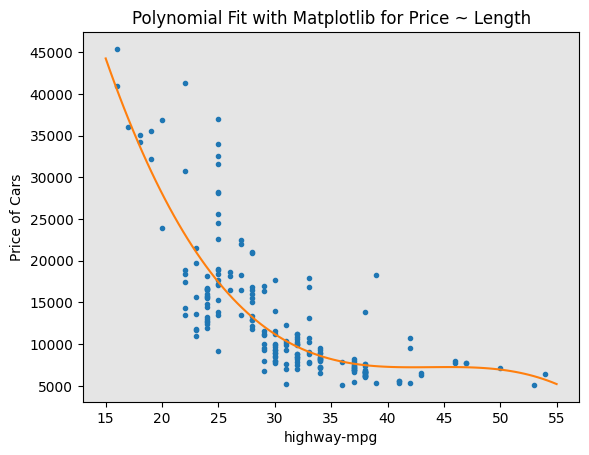

In [38]:
PlotPolly(p,x,y,'highway-mpg')

In [39]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

The polynomial model performs better than the linear model because the generated polynomial function "hits" more of the data points

Creating a 11 order polynomial model with the variables x and y from above.

In [40]:
f1=np.polyfit(x,y,11)
p1=np.poly1d(f1)
print(p1)

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


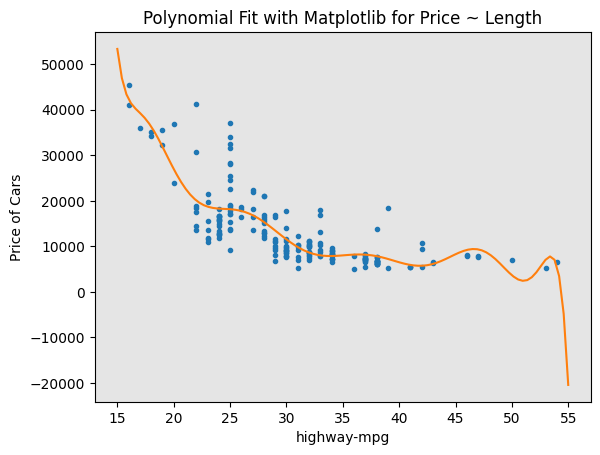

In [41]:
PlotPolly(p1,x,y,'highway-mpg')

As the analytical expression for Multivariate Polynomial function gets complicated, therefore performing <b>Polynomial Transform</b> on multiple features

In [42]:
from sklearn.preprocessing import PolynomialFeatures

Creating a PolynomialFeatures object of degree 2

In [43]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [44]:
Z_new=pr.fit_transform(Z)

In [45]:
print("The shape of original data is: ", Z.shape)

The shape of original data is:  (201, 4)


In [46]:
print("The shape of transformed data is: ", Z_new.shape)

The shape of transformed data is:  (201, 15)


<b>Pipelines</b> simplify the steps of processing the data

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Creating the pipeline by creating a list of tuples including the name of the model or estimator and its corresponding constructor

In [48]:
new_input=[('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]

Input the list as an argument to the pipeline constructor

In [49]:
pipe=Pipeline(new_input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

Converting the data type of Z to type float to avoid conversion warnings that may appear as a result of StandardScaler and then normalizing the data, performing  transform and fitting the model

In [50]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [51]:
ypipe=pipe.predict(Z)
ypipe

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555,
       16136.29619164, 13880.09787302, 15041.58694037, 15457.93465485,
       17974.49032347, 10510.56542385, 10510.56542385, 15845.70697835,
       16068.03816037, 18547.43547305, 25222.41976123, 25176.06409341,
       26518.01037743,  5896.19728097,  6225.67595805,  6265.22601565,
        5976.20889391,  5832.72306295, 10109.23396371,  6061.05969767,
        6118.14411398,  6118.14411398, 10042.92800648, 11301.10641037,
       18336.04622938,  7336.72885437,  6420.49643279,  5174.21296336,
        6619.35236359,  6652.09244229,  6765.45204951,  6795.56233742,
        8796.64497511,  8948.23637645,  8991.91184621,  9194.18038695,
       10928.27635866, 10052.96792101,  9660.68466801, 12124.39546671,
       36318.61803898, 36318.61803898, 41642.8179005 ,  5912.27956733,
        5928.15567673,  5941.11734652,  6046.17348651,  6059.47585172,
       10195.17246527, 10195.17246527, 10183.58560528, 15943.91103394,
      

Creating a pipeline that standardizes the data, produces a prediction using a linear regression model using the features Z and target y

In [52]:
input1=[('scale', StandardScaler()), ('model', LinearRegression())]
pipe1=Pipeline(input1)
pipe1.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()), ('model', LinearRegression())])

In [53]:
ypipe1=pipe1.predict(Z)
ypipe1

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097, 10722.32509097, 17804.80307397,
       18063.72662867, 19320.78745066, 26968.56492801, 27674.72007721,
       28191.0677239 ,   650.62317688,  5648.50489642,  5813.27443123,
        5478.81383232,  5370.64136587,  8739.61952024,  5799.04215638,
        5902.61157827,  5902.61157827,  9036.2046829 , 11863.43973759,
       18767.70667001,  4808.3090102 ,  5693.32889063,  4006.47212651,
        6118.73075572,  6194.05397163,  6448.26982534,  6514.17763926,
        9478.65495235,  9728.16310506,  9798.77861998, 10118.90228761,
       11178.86719942, 10423.81935057,  9463.46710755, 12626.61544369,
       34470.03895495, 34470.03895495, 43996.52260522,  5265.67702191,
        5565.15645357,  5588.69495854,  5777.00299832,  5800.5415033 ,
        7337.21461795,  7337.21461795,  7360.75312292, 10536.2966792 ,
      

<h2>4. Measures for In-Sample Evaluation</h2>

<p>Meaures for In-sample evaluation is a quantitative measure to determine how accurate the model is.</p>

<p>Two very important measures that are often used in Statistics to determine the accuracy of a model are:</p>
<ul>
    <li><b>R^2 / R-squared</b></li>
    <li><b>Mean Squared Error (MSE)</b></li>
</ul>
    
<b>R-squared</b>
<p>R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.</p>
<p>The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.</p>

<b>Mean Squared Error (MSE)</b>
<p>The Mean Squared Error measures the average of the squares of errors. That is, the difference between actual value (y) and the estimated value (ŷ).</p>

<h5>Model 1: Simple Linear Regression</h5>

Calculating R^2

In [54]:
lm.fit(X, Y)
print('The R-squared error is: ', lm.score(X, Y))

The R-squared error is:  0.4965911884339176


<b>Conclusion: </b>~49.659% of the variation of the price is explained by this simple linear model "horsepower_fit"


Calculating the MSE

In [55]:
#predicting the output where X is the predictor
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [56]:
from sklearn.metrics import mean_squared_error

In [57]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


<h5>Model 2: Multiple Linear Regression</h5>

Calculating R^2

In [58]:
lm.fit(Z, df['price'])
print("The R-squared error is: ", lm.score(Z,df['price']))

The R-squared error is:  0.8093562806577457


<b>Conclusion: </b>~80.896 % of the variation of price is explained by this multiple linear regression "multi_fit"

Calculating MSE

In [59]:
##predicting the output where Z is the predictor
Y_predict_multifit = lm.predict(Z)

In [60]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


<h5>Model 3: Polynomial Fit</h5>

Calculating R^2

In [61]:
from sklearn.metrics import r2_score

In [62]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


 <b>Conclusion: </b>~67.419 % of the variation of price is explained by this polynomial fit

Calculating MSE

In [63]:
mean_squared_error(df['price'], p(x))

20474146.426361207

<h2>5. Prediction and Decision Making</h2>
<h3>Prediction</h3>

In [64]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

In [65]:
inp1=np.arange(1, 100, 1).reshape(-1, 1)

In [66]:
lm.fit(X, Y)
lm

LinearRegression()

In [67]:
yhat=lm.predict(inp1)
yhat[0:5]

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

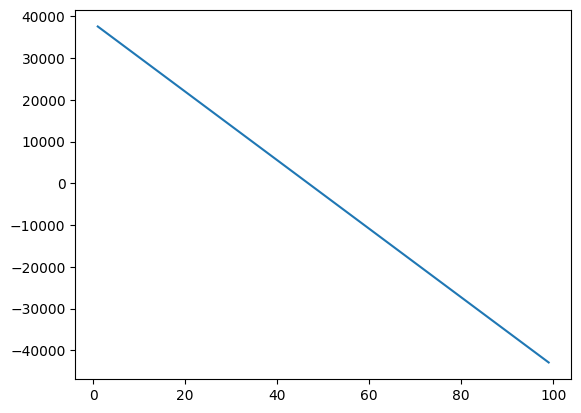

In [68]:
plt.plot(inp1, yhat)
plt.show()

<h3>Decision Making: Determining a Good Model Fit</h3>

When comparing models, the model with the higher R-squared value is a better fit for the data and he model with the smallest MSE value is a better fit for the data 

<h4>The values for the different models are :</h4>
<p>Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.49659118843391759</li>
    <li>MSE: 3.16 x10^7</li>
</ul>
</p>
    
<p>Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.
<ul>
    <li>R-squared: 0.80896354913783497</li>
    <li>MSE: 1.2 x10^7</li>
</ul>
</p>
    
<p>Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.6741946663906514</li>
    <li>MSE: 2.05 x 10^7</li>
</ul>
</p>

<h4>Simple Linear Regression Model (SLR) vs Multiple Linear Regression Model (MLR)</h4>
<p><b>MSE</b>: The MSE of SLR is 3.16x10^7 while MLR has an MSE of 1.2 x10^7. The MSE of MLR is much smaller.</p>
<p><b>R-squared</b>: In this case, we can also see that there is a big difference between the R-squared of the SLR and the R-squared of the MLR. The R-squared for the SLR (~0.497) is very small compared to the R-squared for the MLR (~0.809).</p>
MLR seems like the better model fit in this case compared to SLR.

<h4>Simple Linear Model (SLR) vs. Polynomial Fit</h4>
<p><b>MSE</b>: We can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.</p>
<p><b>R-squared</b>: The R-squared for the Polynomial Fit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.</p>
Polynomial Fit resulted a better fit than SLR.

<h4>Multiple Linear Regression (MLR) vs. Polynomial Fit</h4>
<p><b>MSE</b>: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.</p>
<p><b>R-squared</b>: The R-squared for the MLR is also much larger than for the Polynomial Fit.</p>
MLR provides better fit than Polynomial Fit.

<h3>Conclusion: </h3><p> MLR model is the best model</b> to be able to predict price from our dataset.